In [1]:
# !pip install face_recognition matplotlib

LINKS = ['https://pbs.twimg.com/media/E7okHDEVUAE1O6i?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E7jaibgUcAUWvg-?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E7jahEbUcAMNLdU?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E7Jqli9VEAEStvs?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E7Jqk-aUcAcfg3o?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E7EhGi2XoAsMrO5?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E5dhLccUYAUD5Yx?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E5TOAqUVUAMckXT?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E4vK6e0VgAAksnK?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E4Va7u4VkAAKde3?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E4A0ksEUYAIpynP?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E3xXzcyUYAIX1dC?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E2zkvONVcAQEE_S?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E1cBsxDUcAIe_LZ?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E1W4HTRVUAgYkmo?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E1HbVAeVIAId5yP?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E09INVFUcAYpcWo?format=jpg&name=orig',
 'https://pbs.twimg.com/media/E0oh0hmUUAAfJV9?format=jpg&name=orig'
]
IMG_LINK = LINKS[1]

In [2]:
import face_recognition
import matplotlib.pyplot as plt
from urllib.request import urlopen
import io
import numpy as np
from PIL import Image, ImageDraw, ImageOps
from pprint import pprint

In [3]:
fd = urlopen(IMG_LINK)
img_buf = io.BytesIO(fd.read())

In [4]:
f_img: np.ndarray = face_recognition.load_image_file(img_buf)
face_locations = face_recognition.face_locations(f_img)
face_landmarks_list = face_recognition.face_landmarks(f_img)

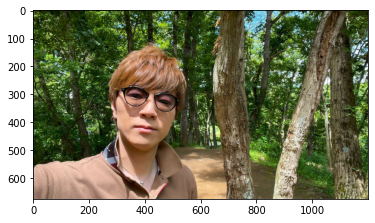

In [5]:
plt.imshow(f_img)

In [6]:
print("detected: %d face(s)"%len(face_locations))
for idx, (loc, land) in enumerate(zip(face_locations, face_landmarks_list)):
    print("face %02d: %s"%(idx,loc))
    pprint(land["left_eye"])
    pprint(land["right_eye"])
    l_e, r_e = land["left_eye"][0], land["right_eye"][0]
    mid_face=((l_e[0]+r_e[0])/2, (l_e[1]+r_e[1])/2,)
    print("middle forehead:", mid_face)

detected: 1 face(s)
face 00: (231, 557, 498, 290)
[(350, 303), (365, 304), (377, 306), (389, 312), (374, 312), (361, 309)]
[(453, 325), (468, 326), (480, 329), (489, 333), (477, 335), (465, 331)]
middle forehead: (401.5, 314.0)


w,h: (1200, 675)


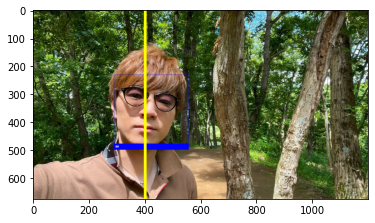

In [7]:
d=Image.fromarray(f_img)
s=d.size
print("w,h:",d.size)
draw = ImageDraw.Draw(d)
mid_faces=[]
for idx, ((top, right, bottom, left),land) in enumerate(zip(face_locations, face_landmarks_list)):
    name = str("%02d"%idx)
    
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

    l_e, r_e = land["left_eye"][0], land["right_eye"][0]
    mid_face=((l_e[0]+r_e[0])/2, (l_e[1]+r_e[1])/2,)
    mid_faces.append(mid_face)
    draw.line(((mid_face[0], -10), mid_face, (mid_face[0], d.size[0])), fill=(255, 255, 0), width=10)
del draw
plt.imshow(d)

face 01: (231,557), (498,290)


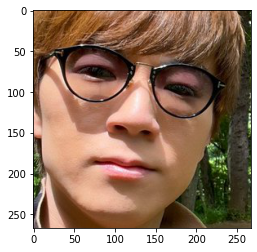

In [8]:
for idx, face_location in enumerate(face_locations):
    top, right, bottom, left = face_location
    print("face %02d: (%d,%d), (%d,%d)"%(idx+1, *face_location))
    cropped_face_img = f_img[top:bottom, left:right]
    pil_img = Image.fromarray(cropped_face_img)
    plt.imshow(pil_img)

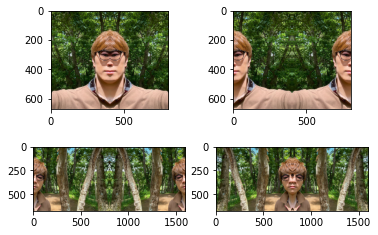

In [9]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
fig = plt.figure()

mid_face = mid_faces[0]
cropped_left_img = f_img[0:s[1],0:int(mid_face[0])]

pil_img = Image.fromarray(cropped_left_img)
fig.add_subplot(2, 2, 1)
plt.imshow(get_concat_h(pil_img,ImageOps.mirror(pil_img)))
fig.add_subplot(2, 2, 2)
plt.imshow(get_concat_h(ImageOps.mirror(pil_img),pil_img))

cropped_right_img = f_img[0:s[1],int(mid_face[0]):s[0]]
pil_img = Image.fromarray(cropped_right_img)
fig.add_subplot(2, 2, 3)
plt.imshow(get_concat_h(pil_img,ImageOps.mirror(pil_img)))
fig.add_subplot(2, 2, 4)
plt.imshow(get_concat_h(ImageOps.mirror(pil_img),pil_img))